In [ ]:
!pip install top2vec[sentence_encoders]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 68.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 103.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 85.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp310-cp310-linux_x86_64.whl size=3541969 sha256=8c1206bb09ee34d65a9964e9278e7d497e2e355d39bd81d27b45aab8ff229020
  Stored in directory: /root/.cache/pip/wheels/dc/52/e3/6c6b60b126b4d5c4370cb5ac071b82950f91649d62d72f7f56
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256

In [ ]:
import numpy as np
import pandas as pd
from top2vec import Top2Vec

In [ ]:
from sklearn.datasets import fetch_20newsgroups

newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

In [ ]:
newsgroups.data

["\n\nI am sure some bashers of Pens fans are pretty confused about the lack\nof any kind of posts about the recent Pens massacre of the Devils. Actually,\nI am  bit puzzled too and a bit relieved. However, I am going to put an end\nto non-PIttsburghers' relief with a bit of praise for the Pens. Man, they\nare killing those Devils worse than I thought. Jagr just showed you why\nhe is much better than his regular season stats. He is also a lot\nfo fun to watch in the playoffs. Bowman should let JAgr have a lot of\nfun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final\nregular season game.          PENS RULE!!!\n\n",
 'My brother is in the market for a high-performance video card that supports\nVESA local bus with 1-2MB RAM.  Does anyone have suggestions/ideas on:\n\n  - Diamond Stealth Pro Local Bus\n\n  - Orchid Farenheit 1280\n\n  - ATI Graphics Ultra Pro\n\n  - Any other high-per

In [ ]:
len(newsgroups.data)

18846

In [ ]:
from top2vec import Top2Vec

model = Top2Vec(newsgroups.data, workers=4, embedding_model='universal-sentence-encoder')

2023-06-18 05:04:41,510 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2023-06-18 05:04:48,179 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2023-06-18 05:05:02,432 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2023-06-18 05:05:40,588 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2023-06-18 05:06:10,130 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-06-18 05:06:13,212 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [ ]:
model.get_num_topics()

102

In [ ]:
topic_sizes, topic_nums = model.get_topic_sizes()

In [ ]:
topic_sizes

array([1640,  720,  660,  623,  587,  578,  575,  455,  446,  417,  415,
        397,  382,  339,  326,  307,  302,  275,  262,  244,  232,  226,
        218,  218,  217,  215,  211,  195,  191,  187,  178,  176,  172,
        163,  159,  158,  157,  149,  146,  143,  133,  131,  129,  129,
        127,  127,  126,  120,  119,  119,  119,  118,  116,  116,  115,
        115,  114,  114,  109,  108,  105,  102,  102,  102,  102,   94,
         92,   88,   87,   87,   82,   82,   79,   77,   77,   75,   71,
         70,   68,   66,   64,   64,   60,   55,   55,   53,   53,   52,
         51,   51,   51,   50,   49,   48,   46,   45,   43,   43,   40,
         38,   35,   27])

In [ ]:
topic_nums

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101])

In [ ]:
model.topic_words

array([['recchi', 'potvin', 'nyr', ..., 'tampa', 'binghamton', 'pitt'],
       ['diagnosed', 'symptoms', 'diagnosis', ..., 'contains',
        'suffered', 'patents'],
       ['spacecraft', 'jpl', 'orbiter', ..., 'comet', 'scientist',
        'launches'],
       ...,
       ['camera', 'lens', 'cameras', ..., 'buyer', 'shoot', 'manuals'],
       ['armenians', 'ankara', 'armenian', ..., 'discussed', 'the',
        'athena'],
       ['utilities', 'neighbors', 'rent', ..., 'ownership', 'concerning',
        'pipes']], dtype='<U15')

In [ ]:
model.topic_words[0]

array(['recchi', 'potvin', 'nyr', 'nyi', 'lemieux', 'lindros', 'nhl',
       'phillies', 'defenseman', 'mets', 'ahl', 'jagr', 'bruins', 'cubs',
       'sabres', 'gretzky', 'alomar', 'pitchers', 'pitching', 'clemens',
       'canucks', 'inning', 'henrik', 'innings', 'yankees', 'oilers',
       'islanders', 'boswell', 'utica', 'braves', 'hockey', 'rangers',
       'leafs', 'flyers', 'baseball', 'sox', 'playoffs', 'wpg', 'dodgers',
       'espn', 'goalie', 'fuhr', 'playoff', 'ulf', 'hawks', 'batting',
       'pittsburgh', 'tampa', 'binghamton', 'pitt'], dtype='<U15')

In [ ]:
topic_words, word_scores, topic_nums = model.get_topics(102)
for words, scores, nums in zip(topic_words, word_scores, topic_nums):
  print("Topic Number: ",nums)
  print(f"Words: {words}")
  print("\n")

Topic Number:  0
Words: ['recchi' 'potvin' 'nyr' 'nyi' 'lemieux' 'lindros' 'nhl' 'phillies'
 'defenseman' 'mets' 'ahl' 'jagr' 'bruins' 'cubs' 'sabres' 'gretzky'
 'alomar' 'pitchers' 'pitching' 'clemens' 'canucks' 'inning' 'henrik'
 'innings' 'yankees' 'oilers' 'islanders' 'boswell' 'utica' 'braves'
 'hockey' 'rangers' 'leafs' 'flyers' 'baseball' 'sox' 'playoffs' 'wpg'
 'dodgers' 'espn' 'goalie' 'fuhr' 'playoff' 'ulf' 'hawks' 'batting'
 'pittsburgh' 'tampa' 'binghamton' 'pitt']


Topic Number:  1
Words: ['diagnosed' 'symptoms' 'diagnosis' 'severe' 'vax' 'treatments' 'immune'
 'dr' 'doctors' 'candida' 'surgery' 'cure' 'patients' 'lyme' 'medicine'
 'treatment' 'doctor' 'treated' 'physician' 'chronic' 'therapy' 'disease'
 'vitamin' 'substance' 'syndrome' 'infected' 'placebo' 'lh' 'oral'
 'illness' 'convinced' 'anti' 'intervention' 'medical' 'genetic'
 'physicians' 'rx' 'infection' 'studied' 'proven' 'risks' 'examined'
 'extensive' 'containing' 'std' 'tested' 'patient' 'contains' 'suffered'

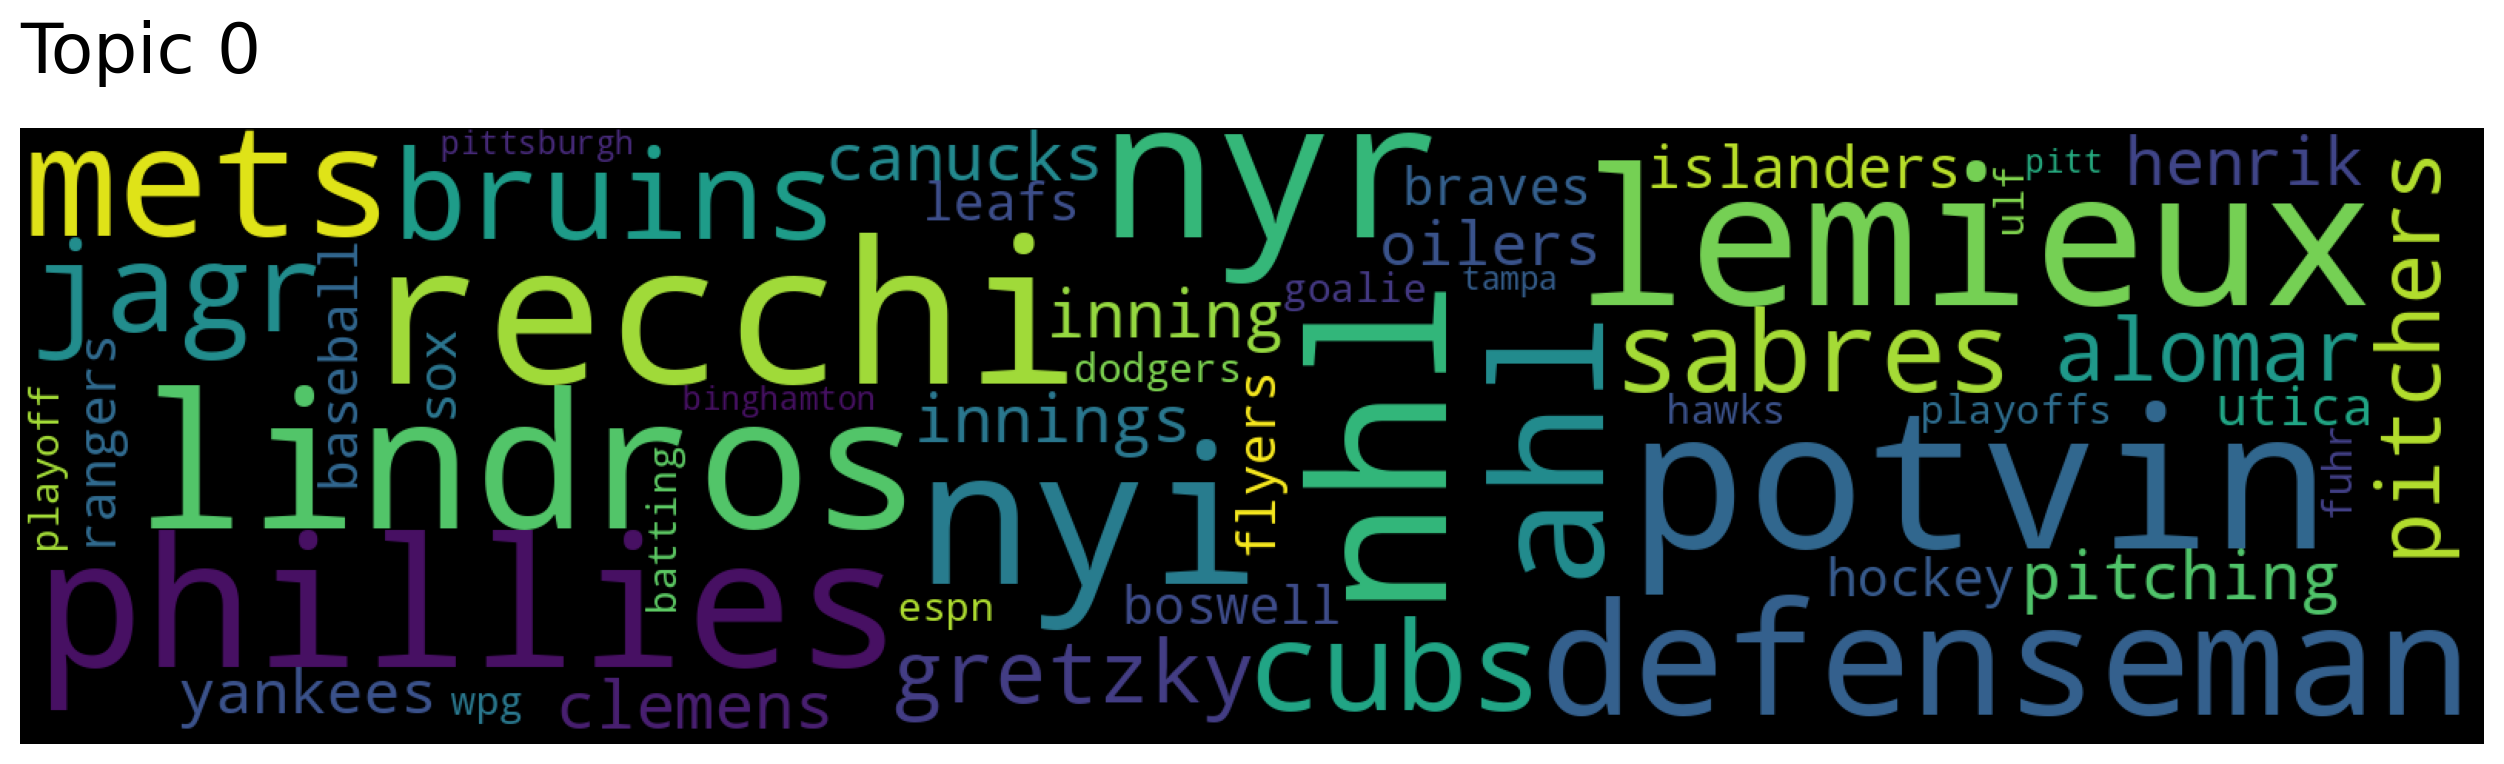

In [ ]:
model.generate_topic_wordcloud(0)

In [ ]:
model.topic_vectors

array([[-0.00774747, -0.08736255, -0.05321174, ...,  0.01895838,
        -0.12138373, -0.00019706],
       [-0.04119424, -0.02791618,  0.02317339, ...,  0.07334149,
        -0.06200121, -0.05255268],
       [-0.03428886, -0.04772402, -0.02887906, ...,  0.04862601,
        -0.04543144, -0.03566515],
       ...,
       [-0.04162263, -0.06320167, -0.04113033, ...,  0.03082044,
        -0.01456477, -0.06863619],
       [-0.04851221,  0.04743872,  0.01646582, ...,  0.04235259,
        -0.0211869 , -0.05172009],
       [-0.02149086, -0.03765531, -0.01235451, ...,  0.02831238,
         0.06148875,  0.05081066]], dtype=float32)

In [ ]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["politics"], num_topics=3)

In [ ]:
topic_words, topic_scores

([array(['clinton', 'bush', 'president', 'democratic', 'reagan',
         'republicans', 'congress', 'elected', 'wiretap', 'johnson',
         'election', 'politically', 'politicians', 'administration',
         'executive', 'politics', 'bill', 'senate', 'corrupt', 'political',
         'ford', 'rockefeller', 'gov', 'nuy', 'democracy', 'lib', 'nist',
         'constitutional', 'liar', 'libertarian', 'affairs', 'libertarians',
         'secretary', 'weren', 'government', 'iraq', 'nsa', 'feds',
         'convention', 'bullshit', 'barry', 'grant', 'jefferson', 'hitler',
         'don', 'based', 'fool', 'fascist', 'koresh', 'govt'], dtype='<U15'),
  array(['um', 'ci', 'oo', 'll', 'ye', 'hmm', 'un', 'uh', 'y_', 'wt', 'on',
         'uu', 'actually', 'an', 'eh', 'way', 'des', 'er', 'se', 'not',
         'has', 'huh', 'of', 'ya', 'so', 'it', 'in', 'le', 'upon', 'hm',
         'one', 'is', 'es', 'ne', 'at', 'what', 'no', 'au', 'est', 'shut',
         'mm', 'got', 'dont', 'lo', 'tu', 'en', 'the

In [ ]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=0, num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 12405, Score: 0.7510523796081543
-----------

I think this guy is going to be just a little bit disappointed.  Lemieux
two, Tocchet, Mullen, Tippett, and Jagr.  I buzzed my friend because I forgot
who had scored Mullen's goal.  I said, "Who scored?  Lemieux two, Tocchet,
Tippett, Jagr."  The funny part was I said the "Jagr" part non-chalantly as
he was in the process of scoring while I was asking this question!!! :-)

All in all ABC's coverage wasn't bad.  On a scale of 1-10, I give it about
an 8.  How were the games in the Chi/St. Louis/LA area???


That's stupid!!!  I'd complain to the television network!  If I were to even
see a Pirates game on instead of a Penguins game at this time of the year, I
and many other Pittsburghers would surely raise hell!!!


Texas is off to a good start, they may pull it out this year.  Whoops!  That
belongs in rec.sport.baseball!!!
-----------

Document: 2614, Score: 0.7316591143608093
-----------
1992-93 Los Angeles Kings notes.
-----------

In [ ]:
topic_mapping = model.hierarchical_topic_reduction(num_topics=20)

In [ ]:
topic_mapping[1]

[59, 11, 67, 101, 87, 72, 55, 44, 48, 32]

In [ ]:
model.topic_words_reduced[0]

array(['recchi', 'potvin', 'nyr', 'lemieux', 'nyi', 'lindros', 'nhl',
       'defenseman', 'phillies', 'mets', 'ahl', 'jagr', 'bruins',
       'sabres', 'cubs', 'gretzky', 'alomar', 'clemens', 'pitchers',
       'henrik', 'pitching', 'canucks', 'inning', 'yankees', 'oilers',
       'innings', 'boswell', 'utica', 'islanders', 'braves', 'rangers',
       'hockey', 'flyers', 'leafs', 'sox', 'wpg', 'baseball', 'playoffs',
       'dodgers', 'goalie', 'espn', 'fuhr', 'ulf', 'playoff', 'hawks',
       'pittsburgh', 'pitt', 'binghamton', 'tampa', 'batting'],
      dtype='<U15')